# Data analysis

### Import of libraries

In [583]:
import pandas as pd
import json
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os, re, sys, glob, math
import warnings; warnings.simplefilter('ignore')
import statsmodels.api as sm # import statsmodels
import lzma 
import base64
from statistics import mean, median
from matplotlib.ticker import PercentFormatter

# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

### Import of data

In [584]:
subfolder = 'Pilot2'
outputpath = f'../output/{subfolder}/'
outputpathErrors = f'../output/{subfolder}/errors/'

### Cleaning data

In [585]:
def merge_all_files(keyword,subfolder='main'):
    all_files = glob.glob(os.path.join(r'../data/'+subfolder+'/', keyword + '*.csv'))
    return pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True, sort=True)

data = merge_all_files('Paternalists',subfolder=subfolder)
data = data[data['Q91'].apply(lambda x: len(str(x)) == 24)] # Only keep those with Prolific ID
data
# data = pd.read_csv (r'C:\Users\gonar\Desktop\ProceduralPaternalism\analysis\data\Pilot1\Choosers_Pilot1.csv')
# print (data)

11_Q45 11_Q519_Click Count 11_Q519_First Click 11_Q519_Last Click  \
3     NaN                 NaN                 NaN                NaN   
4     NaN                 NaN                 NaN                NaN   
5     NaN                 NaN                 NaN                NaN   
6     NaN                 NaN                 NaN                NaN   
7     NaN                 NaN                 NaN                NaN   
8     NaN                 NaN                 NaN                NaN   
9     NaN                 NaN                 NaN                NaN   
10    NaN                 NaN                 NaN                NaN   
11    NaN                 NaN                 NaN                NaN   
12    NaN                 NaN                 NaN                NaN   
13    NaN                 NaN                 NaN                NaN   
14    NaN                 NaN                 NaN                NaN   
15    NaN                 NaN                 NaN                NaN   
16    NaN                 NaN                 NaN                NaN   
17    NaN                 NaN                 NaN                NaN   
18    NaN                 NaN                 NaN                NaN   
19    NaN                 NaN                 NaN                NaN   
20    NaN                 NaN                 NaN                NaN   
21    NaN                 NaN                 NaN                NaN   
22    NaN                 NaN                 NaN                NaN   
23    NaN                 NaN                 NaN                NaN   
24    NaN                 NaN                 NaN                NaN   
25    NaN                 NaN                 NaN                NaN   
26    NaN                 NaN                 NaN                NaN   
27    NaN                 NaN                 NaN                NaN   
28    NaN                 NaN                 NaN                NaN   
29    NaN                 NaN                 NaN                NaN   
30    NaN                 NaN                 NaN                NaN   
31    NaN                 NaN                 NaN                NaN   
32    NaN                 NaN                 NaN                NaN   
33    NaN                 NaN                 NaN                NaN   
34    NaN                 NaN                 NaN                NaN   
35    NaN                 NaN                 NaN                NaN   
36    NaN                 NaN                 NaN                NaN   
37    NaN                 NaN                 NaN                NaN   
38    NaN                 NaN                 NaN                NaN   
39    NaN                 NaN                 NaN                NaN   
40    NaN                 NaN                 NaN                NaN   
41    NaN                 NaN                 NaN                NaN   
42    NaN                 NaN                 NaN                NaN   
43    NaN                 NaN                 NaN                NaN   
44    NaN                 NaN                 NaN                NaN   
45    NaN                 NaN                 NaN                NaN   
46    NaN                 NaN                 NaN                NaN   
47    NaN                 NaN                 NaN                NaN   
48    NaN                 NaN                 NaN                NaN   
49    NaN                 NaN                 NaN                NaN   
50    NaN                 NaN                 NaN                NaN   
51    NaN                 NaN                 NaN                NaN   
52    NaN                 NaN                 NaN                NaN   

   11_Q519_Page Submit 11_Q534 11_Q541_Click Count 11_Q541_First Click  \
3                  NaN     NaN                 NaN                 NaN   
4                  NaN     NaN                 NaN                 NaN   
5                  NaN     NaN                 NaN                 NaN   
6                  NaN     NaN    

In [586]:
useless_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'RecordedDate', 'ResponseId', 'RecipientLastName', 
                   'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 
                   'UserLanguage']
                   
for col in useless_columns:
    drop_columns = [el for el in data.columns if el[-len(col):]==col]
    data.drop(columns=drop_columns,inplace=True)
    
len(data)

50

### Errors

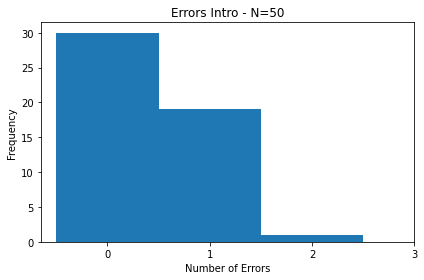

In [587]:
y = [int(i)-1 for i in  data['errorCountIntro']]
xLabels = range(max(y)+2)
x = np.arange(max(y)+2)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Number of Errors')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.savefig(outputpathErrors+'errorsIntro.png',dpi=1000)
plt.show()

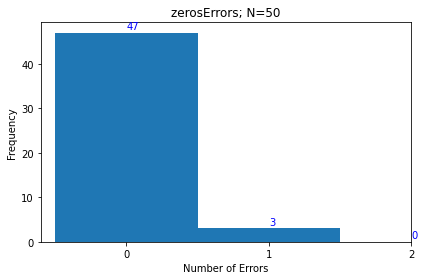

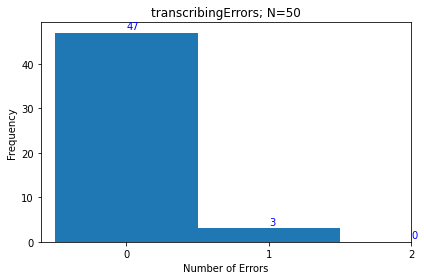

In [588]:
for var in [data['zerosErrors'], data['transcribingErrors']]:
    fig, ax = plt.subplots()
    y = [int(i) for i in  var]
    xLabels = range(max(y)+2)
    x = np.arange(max(y)+2)
    ax.hist(y,x-0.5, width=1)
    plt.ylabel('Frequency')
    for i in range(max(y)+2):
        plt.text(i,y.count(i)+.8,y.count(i), color='blue')
    plt.xticks(x, xLabels)
    plt.xlabel('Number of Errors')
    plt.title(f"{var.name}; N={len(y)}")
    plt.tight_layout()
    plt.savefig(outputpathErrors+ var.name +'.png',dpi=1000)
    plt.show()

In [589]:
data = data[data['errorCountIntro'].astype(int) <3]
data = data[data['zeros1']!='B']
print(len(data))

48


### Zeros

In [590]:
varlistZeros = [data['zeros1'], data['zeros2'], data['zeros3'], data['zeros4'], data['zeros5']]
cumSum = data['zeros1']
for var in varlistZeros[1:]:
    cumSum = cumSum.add(var)
data['cumSumzeros'] = cumSum
print(data['cumSumzeros'])

3       NaN
4       NaN
5     AABBB
6       NaN
7     AABBB
8     AAABB
9       NaN
10      NaN
12      NaN
13    AAABB
14      NaN
16      NaN
17    ABBBB
18    AABBB
19      NaN
20    AAABB
21      NaN
22      NaN
23    AABBB
24    AABBB
25      NaN
26    AABBB
27    AABBB
28    AAABB
29      NaN
30      NaN
31    AAABB
32      NaN
33      NaN
34    AAAAA
35    AABBB
36      NaN
37      NaN
38      NaN
39    AABBB
40      NaN
41    AABBB
42    AAAAA
43    ABAAA
44      NaN
45    AAAAA
46    AAAAA
47      NaN
48    AAABB
49      NaN
50    AAAAA
51      NaN
52      NaN
Name: cumSumzeros, dtype: object


In [591]:
data = data[data['cumSumzeros']!='ABAAA']
print(len(data))

47


In [592]:
varlistZeros = [data['zeros1'], data['zeros2'], data['zeros3'], data['zeros4'], data['zeros5']]
zeros = []
count = 0
for var in varlistZeros:
    count += 1
    for i in  var:
        if i == 'A':
            i=0
        elif i == 'B':
            i=2
        zeros.append(i)
    data[f'IntZeros{count}'] = zeros
    zeros=[]

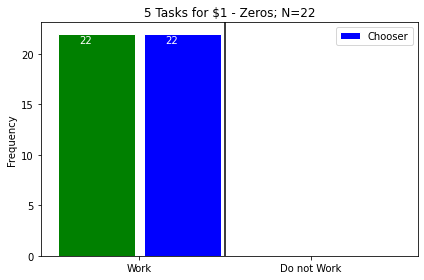

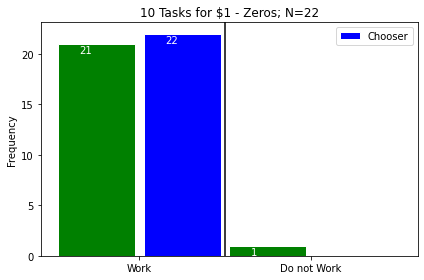

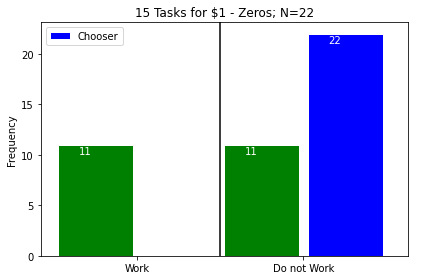

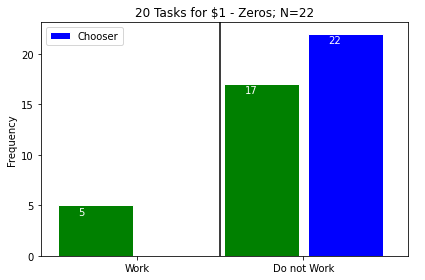

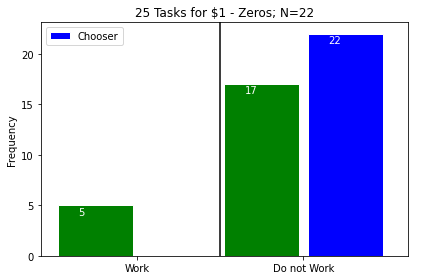

In [593]:
varlistZerosInt = [data['IntZeros1'], data['IntZeros2'], data['IntZeros3'], data['IntZeros4'], data['IntZeros5']]
for var in varlistZerosInt:
    count = int(var.name[-1])*5
    fig, ax = plt.subplots()
    y = [int(i) for i in  var if pd.isnull(i) == False]
    if count < 11:
        y1 = [1]*len(y)
    else:
        y1 = [3]*len(y)
    x = np.arange(5)
    y = y+y1
    xLabels = ['Work', 'Do not Work']
    N, bins, patches = ax.hist(y,x-0.25, edgecolor='white', linewidth=1, width=0.9, label='Chooser', color='b')
    ax.legend(prop={'size': 10})
#     patches = ax.hist(y,, width=0.5)
    for i in [0,2]:
        patches[i].set_facecolor('green')
    for i in [1, 3]:
        patches[i].set_facecolor('blue')
    plt.ylabel('Frequency')
    for i in range(max(y)+2):
        plt.text(i,y.count(i)-0.95,y.count(i), color='white')
    xx = [0.7,2.7]
    plt.xticks(xx, xLabels)
    plt.axvline(x=1.7, color='black')
    plt.title(f"{count} Tasks for $1 - {var.name[3:-1]}; N={len([x for x in y if x not in y1])}")
    plt.tight_layout()
    plt.savefig(outputpath+str(count)+ 'tasks' + var.name[3:-1]+'Histo.png',dpi=1000)
    plt.show()

In [594]:
pd.set_option('display.max_colwidth', None)
print(data[data['IntZeros3']==0]['Q695'].dropna())

8                                                            I thought about myself and how much I would want to do if the roles were reversed and I think 20 to 25 tasks is a bit much for $1.
13                                            I chose for the participant to do slightly more work.  I felt like 15 was the median option and it seemed a fair amount to have the person work. 
20                                                                                      Yes, I largely based my decision on how much I would be willing to do to get the bonus and the $/task. 
28                                                                                   Yes, 15 tasks may not be that hard to get the $1 bonus. 20 and 25 are a little too much, but 15 is doable.
31                    In one instance yes because I think that the amount of time that it would take to complete the task would be worth the extra bonus and it would benefit the other person.
34                                      

### Transcribing Numbers

In [595]:
varlistTranscription = [data['transcription1'], data['transcription2'], data['transcription3'], data['transcription4'], data['transcription5']]
cumSum = data['transcription1']
for var in varlistTranscription[1:]:
    cumSum = cumSum.add(var)
data['cumSumTranscription'] = cumSum
print(data['cumSumTranscription'])

3     ABBBB
4     ABBBB
5       NaN
6     ABABB
7       NaN
8       NaN
9     ABBBB
10    AAAAA
12    ABBBB
13      NaN
14    ABBBB
16    AAABB
17      NaN
18      NaN
19    AAABB
20      NaN
21    AABBB
22    AAAAB
23      NaN
24      NaN
25    ABBBB
26      NaN
27      NaN
28      NaN
29    AABBB
30    AAAAA
31      NaN
32    AAAAA
33    AABBB
34      NaN
35      NaN
36    AAAAA
37    ABBBB
38    AAAAB
39      NaN
40    AAABB
41      NaN
42      NaN
44    AABBB
45      NaN
46      NaN
47    AABBB
48      NaN
49    ABBBB
50      NaN
51    AAABB
52    ABBBB
Name: cumSumTranscription, dtype: object


In [596]:
data = data[data['cumSumTranscription']!='ABABB']
print(len(data))

46


In [597]:
varlistTranscription = [data['transcription1'], data['transcription2'], data['transcription3'], data['transcription4'], data['transcription5']]
transc = []
count = 0
for var in varlistTranscription:
    count += 1
    for i in  var:
        if i == 'A':
            i=0
        elif i == 'B':
            i=2
        transc.append(i)
    data[f'IntTranscription{count}'] = transc
    transc=[]

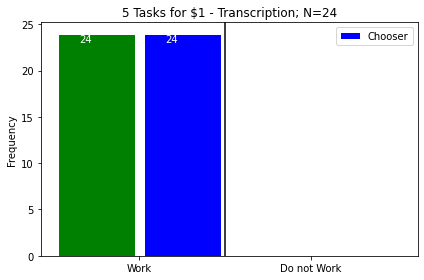

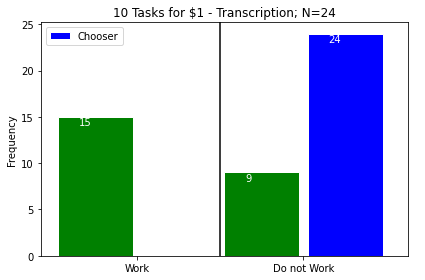

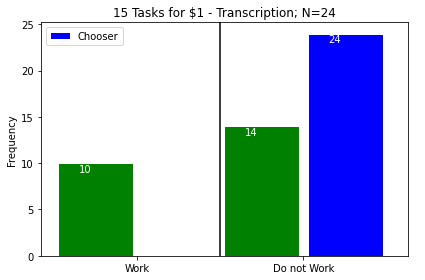

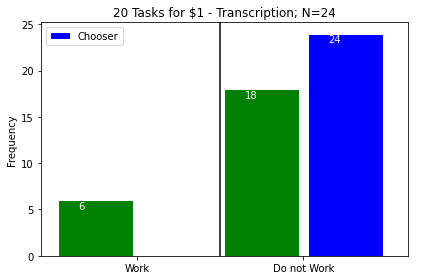

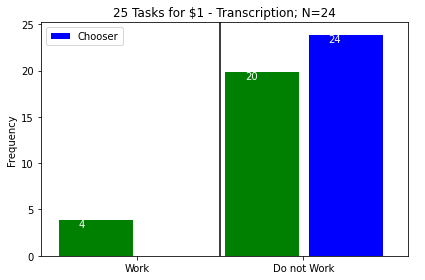

In [598]:
varlistTransciptionInt = [data['IntTranscription1'], data['IntTranscription2'], data['IntTranscription3'], data['IntTranscription4'], data['IntTranscription5']]
for var in varlistTransciptionInt:
    count = int(var.name[-1])*5
    fig, ax = plt.subplots()
    y = [int(i) for i in  var if pd.isnull(i) == False]
    if count < 6:
        y1 = [1]*len(y)
    else:
        y1 = [3]*len(y)
    x = np.arange(5)
    y = y+y1
    xLabels = ['Work', 'Do not Work']
    N, bins, patches = ax.hist(y,x-0.25, edgecolor='white', linewidth=1, width=0.9, label='Chooser', color='b')
    ax.legend(prop={'size': 10})
    for i in [0,2]:
        patches[i].set_facecolor('green')
    for i in [1, 3]:
        patches[i].set_facecolor('blue')
    plt.ylabel('Frequency')
    for i in range(max(y)+2):
        plt.text(i,y.count(i)-0.95,y.count(i), color='white')
    xx = [0.7,2.7]
    plt.xticks(xx, xLabels)
    plt.axvline(x=1.7, color='black')
    plt.title(f"{count} Tasks for $1 - {var.name[3:-1]}; N={len([x for x in y if x not in y1])}")
    plt.tight_layout()
    plt.savefig(outputpath+str(count)+ 'tasks' + var.name[3:-1]+'Histo.png',dpi=1000)
    plt.show()

In [599]:
pd.set_option('display.max_colwidth', None)
print(data[data['IntTranscription2']==0]['Q695'].dropna())

16                                                                                                                                                                                                           Yes, I just thought it was reasonable to get paid $1 to do 15 transcribing tasks
19                                                                                                                                                                                 I chose for them to do more work because it seemed like they chose to do the bare minimum for themselves. 
21                                                                                                                                                                                                                                                  i was thinking of if i was in their shoes
22                                                                                                                                            

### Unincentivized Choices

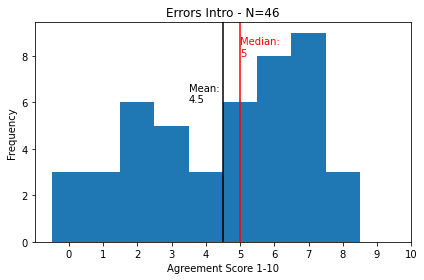

In [600]:
y = [int(i) for i in  data['Q686']]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)-1,6,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y),8,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'ForceWork.png',dpi=1000)
plt.show()

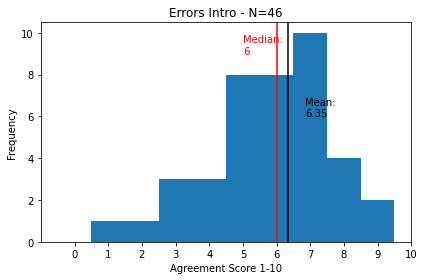

In [601]:
y = [int(i) for i in  data['Q688']]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)+0.5,6,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y)-1,9,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'TemptedLessWork.png',dpi=1000)
plt.show()

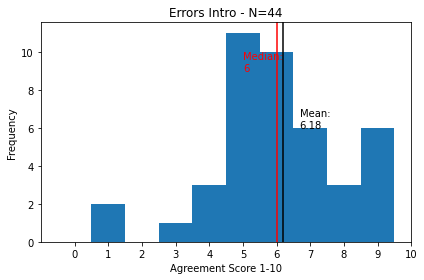

In [602]:
y = [int(i) for i in  data['Q689'].dropna()]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)+0.5,6,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y)-1,9,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'PushHarder.png',dpi=1000)
plt.show()

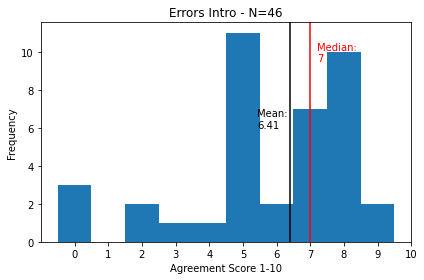

In [603]:
y = [int(i) for i in  data['Q690'].dropna()]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)-1,6,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y)+0.2,9.5,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'BetterOff.png',dpi=1000)
plt.show()

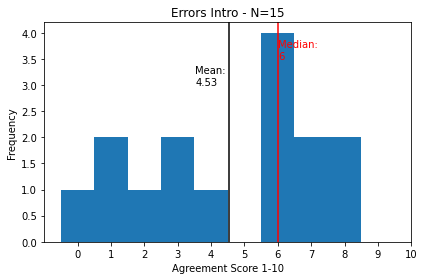

In [604]:
y = [int(i) for i in  data[data['IntTranscription2']==0]['Q686']]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)-1,3,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y),3.5,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'ForceWorkRestricted.png',dpi=1000)
plt.show()

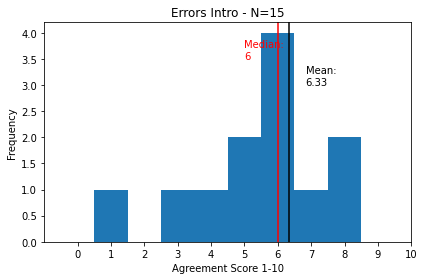

In [605]:
y = [int(i) for i in  data[data['IntTranscription2']==0]['Q688']]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)+0.5,3,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y)-1,3.5,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'TemptedLessWorkRestricted.png',dpi=1000)
plt.show()

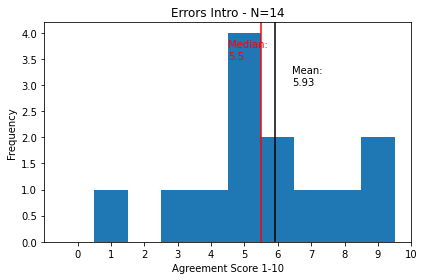

In [606]:
y = [int(i) for i in  data[data['IntTranscription2']==0]['Q689'].dropna()]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)+0.5,3,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y)-1,3.5,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'PushHarder.png',dpi=1000)
plt.show()

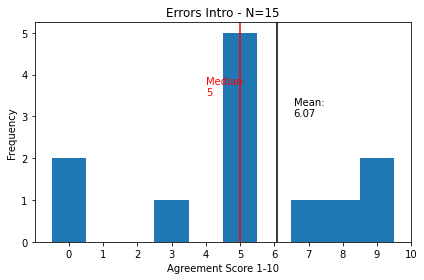

In [607]:
y = [int(i) for i in  data[data['IntTranscription2']==0]['Q690'].dropna()]
xLabels = range(11)
x = np.arange(11)
fig, ax = plt.subplots()
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
plt.xlabel('Agreement Score 1-10')
plt.xticks(x, xLabels)
plt.title(f"Errors Intro - N={len(y)}")
plt.tight_layout()
plt.text(Average(y)+0.5,3,'Mean: \n'+'{0:.3g}'.format(Average(y)))
plt.text(median(y)-1,3.5,'Median: \n'+'{0:.3g}'.format(median(y)),color='r')
plt.axvline(x=Average(y), color='black')
plt.axvline(x=median(y), color='r')
plt.savefig(outputpath+'PushHarder.png',dpi=1000)
plt.show()

## Binding Beliefs

In [ ]:
count = 0
varlistBindingBeliefs = [data['task31'], data['task32'], data['task33'], data['task34'], data['task35']]
for var in varlistBindingBeliefs:
    count +=1
    fig, ax = plt.subplots()
    var = [i.replace("[","").replace("]","") for i in  var]
    col_name = "task3"+str(count)
    data[col_name] = [int(i) for i in  var]
    xLabels = range(max(data[col_name])+2)
    ax.hist(data[col_name], bins=50)
    plt.ylabel('Frequency')
    plt.xlabel('Chance (%)')
    ax.set_title('$' + str(count) + ' Binding Beliefs''{:>10}'.format(f"N={len(data['task31'])}"))
    plt.tight_layout()

    plt.savefig(outputpath+'$'+str(count)+'Histo_BindingBeliefs.png',dpi=1000)
    plt.show()

In [ ]:
medianBinding = []
meanBinding = []
medianBindingCI = []
stdBinding = []
varlistBindingBeliefs = [data['task31'], data['task32'], data['task33'], data['task34'], data['task35']]
for var in varlistBindingBeliefs:
    medianBinding.append(var.median())
    meanBinding.append(var.mean())
    stdBinding.append(var.std())
    medianBindingCI.append(medianCI(var))
print(meanBinding,medianBinding, medianBindingCI)
xLabels = ['$1', '$2', '$3', '$4', '$5']
x = np.arange(5)
width = 0.35       # the width of the bars
fig, ax = plt.subplots()
beliefsMedian = ax.bar(x-width/2 , medianBinding, width, align='center', alpha=0.5, ecolor='black', capsize=4, label='Median Beliefs')
beliefsMean = ax.bar(x+width/2 , meanBinding, width, align='center', alpha=0.5, ecolor='black', capsize=4, label='Mean Beliefs')
# for i in range(len(medianBindingCI)):
#     ax.plot((i-width/2,i-width/2), medianBindingCI[i], linestyle='-', linewidth=1, color='black', marker='_', markersize=5)
ax.set_ylabel('Chance of NOT binding (%)')
ax.set_xlabel('Bonus')
plt.xticks(x, xLabels)
plt.ylim([0, 100])
ax.legend(handles=[beliefsMedian, beliefsMean])

plt.tight_layout()
ax.set_title('What is the chance that the participant is willing to wait...''{:>7}'.format(f"N={len(data['task31'])}"))
plt.savefig(outputpath + 'medianMeanBindingBeliefs.png',dpi=1000)
plt.show()

## Effort: X + Y

In [ ]:
count = 0
e=0
varlistEffort = [data['zerosChoice'], data['triangles'], data['transcription']]
chooserChoice = [5,2,10]
for var in varlistEffort:
    count +=1
    fig, ax = plt.subplots()
    y = [int(i) for i in  var]
#     xLabels = range(max(var)+2)
    ax.hist(y, bins=50, width=0.5)
    plt.ylabel('Frequency')
    plt.xlabel('Tasks')
    xLabels = range(max(y)+2)
    x = np.arange(max(y)+2)
    plt.xticks(x, xLabels)
    countLess = sum(map(lambda x : x<chooserChoice[e], y))
    countMore = sum(map(lambda x : x>chooserChoice[e], y))
    plt.text(0,15, "Imposed less:\n " + str(countLess))
    plt.text(max(y)*0.6,15, "Imposed more: \n" + str(countMore))
    ax.set_title(str(var.name)+'{:>10}'.format(f"N={len(y)}"))
    plt.tight_layout()

    plt.savefig(outputpath + str(var.name) +'.png',dpi=1000)
    plt.show()
    e +=1

In [ ]:
count = 0
e = 0 
varlistEffort = [data['zerosChoice'], data['triangles'], data['transcription']]
chooserChoice = [5,2,10]
for var in varlistEffort:
    count +=1
    fig, ax = plt.subplots()
    y = [int(i)-chooserChoice[e] for i in  var]
#     xLabels = range(max(var)+2)
    ax.hist(y, bins=50, weights=np.ones(len(y)) / len(y))
#     plt.ylabel('Frequency')
    plt.xlabel('Tasks')
    xLabels = range(min(y)-2, max(y)+2)
    x = np.arange(min(y)-2,max(y)+2)
    plt.xticks(x, xLabels)
    ax.set_title(str(var.name)+" - Difference from Chooser's Choice"+'{:>10}'.format(f"N={len(y)}"))
    plt.tight_layout()
    countLess = sum(map(lambda x : x<0, y))
    countMore = sum(map(lambda x : x>0, y))
    plt.text(min(y)*1.2, 0.3, "Imposed less:\n " + str("{:.1f}".format(countLess*100/len(y))) + '%')
    plt.text(max(y)*0.6, 0.3, "Imposed more:\n " + str("{:.1f}".format(countMore*100/len(y))) + '%')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.savefig(outputpath + str(var.name) +'%.png',dpi=1000)
    plt.show()
    e +=1

In [ ]:
a=0
for var in varlistEffort:
    xx = []
    colName = var.name + 'Binary'
    for i in var.index:
        if int(var[i])>chooserChoice[a]:
            xx.append(1)  
        elif int(var[i])<chooserChoice[a]:
            xx.append(-1) 
        else:
            xx.append(0)
    data[colName] = xx
    a += 1

data['cumSumEffort'] = data['zerosChoiceBinary'] + data['trianglesBinary'] + data['transcriptionBinary']

fig, ax = plt.subplots()
ax.hist(data['cumSumEffort'], bins=50)
plt.ylabel('Frequency')
plt.xlabel('Real-Effort Task')
plt.xticks(np.arange(-3, 4, step=1)) 
ax.set_title('Consistency: =5 means always imposed less than belief''{:>10}'.format(f"N={len(data['cumSumEffort'])}"))
plt.tight_layout()
countLess = sum(map(lambda x : x<0, data['cumSumEffort']))
countMore = sum(map(lambda x : x>0, data['cumSumEffort']))
plt.text(-2,9, "<0: \n" + str("{:.0f}".format(countLess))+ ' ('+str("{:.1f}".format(countLess*100/len(y))) + '%)')
plt.text(2.2,9, ">0: \n" + str("{:.0f}".format(countMore))+ ' ('+str("{:.1f}".format(countMore*100/len(y))) + '%)')

plt.savefig(outputpath+'consistencyEffort.png',dpi=1000)
plt.show()

In [ ]:
x = data['cumSum']
y = data['cumSumEffort']
# Calculate the point density
xy = np.vstack([x,y])
z = sp.stats.gaussian_kde(xy)(xy)
fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.title('Consistency across environments')
plt.xlabel('Belief-Surrogate in Waiting')
plt.xticks(np.arange(min(x),max(x)+1, step=1)) 
plt.ylabel('Imposed-Chosen in Effort')
plt.axvline(x=0, color='black', linewidth=0.5)
plt.axhline(y=0, color='black', linewidth=0.5)
plt.tight_layout()
plt.show()
plt.savefig(outputpath+'consistencyAcrossEnvironments.png',dpi=1000)


### Bounds

In [ ]:
for var in [data['CQ41Errors'], data['CQ42Errors'],data['CQ43Errors']]:
    fig, ax = plt.subplots()
    y = [int(i) for i in  var]
    xLabels = range(max(y)+2)
    x = np.arange(max(y)+2)
    ax.hist(y,x-0.5, width=1)
    plt.ylabel('Frequency')
    for i in range(max(y)+2):
        plt.text(i,y.count(i)+.8,y.count(i), color='blue')
    plt.xticks(x, xLabels)
    plt.xlabel('Number of Errors')
    plt.title(f"{var.name}; N={len(var)}")
    plt.tight_layout()
    plt.savefig(outputpathErrors+ var.name +'.png',dpi=1000)
    plt.show()
    data = data[var.astype(int)<4]

In [ ]:
# Python program to get average of a list
def Average(lst):
    return sum(lst) / len(lst)

varlistBoundsMinMax = [data['Min1'], data['Min2'], data['Min3'], data['Min4'], data['Min5'],data['Max1'], data['Max2'], data['Max3'], data['Max4'], data['Max5']]
for var in varlistBoundsMinMax:
    count = var.name[-1]
    fig, ax = plt.subplots()
    varAsList = [int(i) for i in  var]
    xLabels = range(max(varAsList)+2)
    ax.hist(varAsList, bins=50)
    plt.ylabel('Frequency')
    plt.xlabel('Seconds')
    ax.set_title('$' + count + ' ' + str(var.name[:-1]) +' Bound''{:>10}'.format(f"N={len(varAsList)}"))
    plt.tight_layout()
    plt.yticks(np.arange(0,30, step=5)) 
    plt.text(300,8, "Mean: " + str(round(Average(varAsList))) + " sec")
    ax.axvline(x=Average(varAsList))

    plt.savefig(outputpath+'$'+count+ str(var.name) +'Histo_Bounds.png',dpi=1000)
    plt.show()

In [ ]:
varlistBoundsMinMax = [data['Min1'], data['Min2'], data['Min3'], data['Min4'], data['Min5'],data['Max1'], data['Max2'], data['Max3'], data['Max4'], data['Max5']]
for var in varlistBoundsMinMax:
    count = var.name[-1]
    surrogateName = 'surrogate' + var.name[-1]
    varSurrogate = [int(i) for i in  data[surrogateName]]
    varAsList = [int(i) for i in  var]
    varAsList = [x - y for x, y in zip(varAsList, varSurrogate)]
    xLabels = range(max(varAsList)+2)
    fig, ax = plt.subplots()
    ax.hist(varAsList, bins=50)
    plt.ylabel('Frequency')
    plt.xlabel('Seconds')
    ax.set_title('$' + count + ' ' + str(var.name[:-1]) +' Bound Minus Surrogate''{:>10}'.format(f"N={len(varAsList)}"))
    plt.tight_layout()
    plt.yticks(np.arange(0,12, step=2)) 
    plt.text(Average(varAsList)-100,5, "Mean: \n" + str(round(Average(varAsList))) + " sec")
    ax.axvline(x=Average(varAsList))

    plt.savefig(outputpath+'$'+count+ str(var.name) +'Histo_BoundsMinusSurrogate.png',dpi=1000)
    plt.show()

In [ ]:
varlistBoundsMin = [data['Min1'], data['Min2'], data['Min3'], data['Min4'], data['Min5']]
for var in varlistBoundsMin:
    count = var.name[-1]
    maxName = 'Max' + var.name[-1]
    varMax = [int(i) for i in  data[maxName]]
    varMin = [int(i) for i in  var]
    varAsList = [x - y for x, y in zip(varMax, varMin)]
    xLabels = range(max(varAsList)+2)
    fig, ax = plt.subplots()
    ax.hist(varAsList, bins=50)
    plt.ylabel('Frequency')
    plt.xlabel('Seconds')
    ax.set_title('$' + count + ' ' +' Discretion''{:>10}'.format(f"N={len(varAsList)}"))
    plt.tight_layout()
#     plt.yticks(np.arange(0,30, step=5)) 
    plt.text(Average(varAsList)-100,3.5, "Mean: \n" + str(round(Average(varAsList))) + " sec")
    ax.axvline(x=Average(varAsList))

    plt.savefig(outputpath+'$'+count+ str(var.name) +'Histo_BoundsDiscretion.png',dpi=1000)
    plt.show()

# Analysis

### Likert Scales

In [ ]:
# renaming_dict = {}
# for col in data.columns:
#     new_col = col
#     if any(item in col for item in rename_list):
#         if len(col)>len('welfare'):
#             if col[:len('welfare')]=='welfare':
#                 new_col = col[col.rfind('.')+1:]
#     renaming_dict[col]=new_col
# data.columns
# renaming_dict

# renaming_dict.values()
# data.rename(columns=renaming_dict,inplace=True)

labels_agree = [
    'Strongly Disagree',
    'Disagree',
    'Neutral',
    'Agree',
    'Strongly Agree'
]



question_dict = {
#     'screening1': 'Care about dedication when RECEIVING',
#     'screening2': 'Care about dedication when GIVING',
    'statement1': 'the benefit of the other participants',
    'statement2': 'make the surprise bonus for the other participants as large as possible',
    'statement3': 'make sure the other participants know exactly what the truth is',
    'statement4': 'make the likelihood that the donation is made (...), as large as possible',
#     'statement4': 'make the likelihood that the donation is dedicated to the DEDICATION-PARTICIPANT, that the COFFEE-PARTICIPANT drinks Fair Trade coffee, and that the PROTEIN-PARTICIPANT does not drink Cricket Powder, as large as possible',

#     'statement5': 'Choices made to make expectations of OTHER MTURKER accurate',
#     'quote1': 'What you do not know does not hurt you',
#     'quote2': 'I sometimes tell lies to increase other`s well-being'
}


myDict = {
    f"{el.lower()}ForSelf": f"If I were the {el.upper()}-PARTICIPANT I would want the person choosing for me to make the same choices I just made" for el in environments
}

question_dict.update(myDict)
for question in question_dict.keys():
    

    plot_data_dict = dict(data[question].value_counts())

    x = [i for i in range(1,6)]
    y = []
    for i in range(len(x)):
        if x[i] in plot_data_dict.keys():
            y.append(plot_data_dict[x[i]])
        else:
            y.append(0)



    fig, ax = plt.subplots()

    
    ax.bar(x ,y)

    ax.set_ylabel('Frequency')
    ax.set_title(f"{question}: {question_dict[question]} (N={len(data[question].dropna())})")
    ax.set_xticks(x)
    ax.set_xticklabels(labels_agree)

    plt.tight_layout()

#     plt.savefig(outputpath+question+'.pdf')
#     plt.savefig(outputpath+question+'.png',dpi=1200)
    plt.savefig(outputpath+question+'.jpg')
    plt.show()

In [ ]:
# X = data["screening1"] ## X usually means our input variables (or independent variables)
# y = data["screening2"] ## Y usually means our output/dependent variable
# X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
# # Note the difference in argument order
# model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
# predictions = model.predict(X)
# # Print out the statistics
# model.summary()

### Completion Payment

In [ ]:
labels = [
    'Increase',
    'Leave as planned'
]

plot_data_dict = dict(data['completionPay'].value_counts())

x = [1,2]

y = []
for i in range(len(x)):
    if x[i] in plot_data_dict.keys():
        y.append(plot_data_dict[x[i]])
    else:
        y.append(0)



fig, ax = plt.subplots()

ax.bar(x ,y)

ax.set_ylabel('Frequency')
ax.set_title(f"completionPay: Increase completion pay of some other participant or not")
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.tight_layout()

# plt.savefig(outputpath+'completionPay'+'.pdf')
# plt.savefig(outputpath+'completionPay'+'.png',dpi=1200)
# plt.savefig(outputpath+'completionPay'+'.jpg')
plt.show()

### WTP

In [ ]:
# question_IDs

data['WTP_dict']


In [ ]:
# Orignial coding of sides: 
# D1:     Left:     Not dedicated and do not contact; 
#         Right:    Dedicated and do not contact
# D2A:    Left:     Dedicated and contact
#         Right:    Dedicated and do not contact
# D2B:    Left:     Not dedicated and contact; 
#         Right:    Not dedicated and do not contact
# D3:     Left:     Not dedicated and contact
#         Right:    Dedicated and contact

                       

# print(data[['WTP','switches']])
myDict = {
    'left':'right',
    'right':'left',
    'middle':'middle'
}
rows = [-10,-9,-8,-30,-6,-5,-4.5,-4,-3.5,-3,-2.5,-2,-1.305,-1.5,-1.25,-1,-0.305,-0.5,-0.25,0,0.25,0.5,0.305,1,1.25,1.5,1.305,2,2.5,3,3.5,4,4.5,5,6,30,8,9,10]

for environment in environments:
    
    for question in question_IDs:
        myData = []
        for pcode in data.index:
            wtp=json.loads(data.loc[pcode,'WTP_dict'][environment])[-1]
            print(wtp)
            switches=data.loc[pcode,'switches']
            x = wtp[f"gross_{question}"].split(":")
            selectedSide = x[0]
            selectedCutoff = float(x[1])

            if switches[question]:
                selectedSide = myDict[selectedSide]
                selectedCutoff = -1*selectedCutoff

            if question in ['D1','D3']: # this allows us to have all "ideal" cutoffs positive except for D2B

                selectedSide = myDict[selectedSide]
                selectedCutoff = -1*selectedCutoff

            if environment == 'protein':
                selectedSide = myDict[selectedSide]
                selectedCutoff = -1*selectedCutoff
                
            myIndex = rows.index(selectedCutoff)

            if selectedSide=='left':
                temp = min(len(rows)-1,myIndex+1)
            elif selectedSide=='right':
                temp = max(0,myIndex-1)
            else:
                temp = myIndex

            number = (selectedCutoff+rows[int(temp)])/2
            number = round(number,2)
            myData.append(number)

        data[f'final_WTP_{environment}_{question}'] = myData
    
# myData = []
# question = 'kantian'
# for pcode in data.index:
#     wtp = json.loads(data.loc[pcode,'Kant'])[-1]
#     switch = data.loc[pcode,'LR_kant']
#     x = wtp[f"gross_{question}"].split(":")
#     selectedSide = x[0]
#     selectedCutoff = float(x[1])
    
#     if switch:
#         selectedSide = myDict[selectedSide]
#         selectedCutoff = -selectedCutoff

#     myIndex = rows.index(selectedCutoff)

#     if selectedSide=='left':
#         temp = min(len(rows)-1,myIndex+1)
#     elif selectedSide=='right':
#         temp = max(0,myIndex-1)
#     else:
#         temp = myIndex
#     number = (selectedCutoff+rows[int(temp)])/2
#     number = round(number,2)
#     myData.append(number)
# data[f'final_WTP_Kant'] = myData
# WTP_decision = ['WTP1E', 'WTP1H', 'WTP2EasyG', 'WTP2EasyB', 'WTP2HardG', 'WTP2HardB', 'WTP3', 'Kant']
# myDict = {'WTP1E': 'LR_D1_Switched', 'WTP1H': 'LR_D1_Switched','WTP2EasyG': 'LR_D2_Switched','WTP2EasyB': 'LR_D2_Switched', 
#           'WTP2HardG': 'LR_D2_Switched', 'WTP2HardB': 'LR_D2_Switched','WTP3': 'LR_D3_Switched','Kant': 'LR_kant_Switched'}

# # Positive number means that the RIGHT option when there is no switch is PREFERRED

# # Here are the order without switch:
# # WTP1: LEFT: WITH DEDICATION; RIGHT: WITHOUT DEDICATION. We are thus expecting NEGATIVE numbers
# # WTP2G/B: LEFT: TELLING; RIGHT: NOT TELLING. We are thus expecting NEGATIVE numbers for WTP2G and POSTIVE NUMBERS for WTP2B
# # WTP3: LEFT: WITH DEDICATION and INFORMED; RIGHT: WITHOUT DEDICATION and INFORMED. We are thus expecting NEGATIVE numbers
# # Kant: LEFT: USE RESPONSES: RIGHT: DROP RESPONSES. We are thus expecting NEGATIVE numbers

# for wtp in WTP_decision:
        
#     Final_wtp = []
#     for participant in data.index:
        
#         temp = json.loads(data.loc[participant,wtp])
#         dummy = 1
#         if temp['preferred side']=='right':
#             dummy = -1
#         Final_wtp.append(dummy*float(temp['number']))
#     data[f'final_{wtp}'] = Final_wtp

In [ ]:
data.iloc[0]['switches']

In [ ]:
data.iloc[0]['WTP_dict']

In [ ]:
myList = []
for env in environments:
    for n in question_IDs:
        myList.append(f"final_WTP_{env}_{n}")
data[myList]

### Errors and attention

In [ ]:
fig, ax = plt.subplots()
y = data['AttentionCheckErrors']
ax.hist(y,20)
ax.axvline(x=y.mean())
plt.ylabel('Frequency')
plt.xlabel('Time (minutes)')
plt.text(y.mean(), 0 ,"mean: "+str(round(y.mean())),va="bottom",ha="left")
plt.title(f"Histogram of number of errors on attention check page (N={len(y)})")
plt.tight_layout()

plt.savefig(outputpath+'attention_check'+'.pdf')
#plt.savefig(outputpath+'time'+'.png',dpi=1200)
plt.savefig(outputpath+'attention_check'+'.jpg')

plt.show()

In [ ]:
headers = myList + ['InterfacePracticeErrors','InterfacePractice2Errors','InterfaceScreenErrors']

In [ ]:

for el in ['InterfacePractice','InterfacePractice2','InterfaceScreen']:
    myData = []
    for pcode in data.index:
        number=len(json.loads(data.loc[pcode,el]))-1
        
        myData.append(number)

    data[f'{el}Errors'] = myData

num_errors = ['AttentionCheckErrors'] + [f"coffeeCQ{i}Errors" for i in range(1,8)] + [f"proteinCQ{i}Errors" for i in range(1,8)] + [f"donationCQ{i}Errors" for i in range(1,6)]

num_clicks = ['num_clicksPayment','num_clicksDonationCQ', 'num_clicksCoffeeCQ','num_clicksProteinCQ','num_clicksInstructionsForm','num_clicksInstructionsElicitation','num_clicksInstructionsElicitation2','num_clicksInstructionsElicitationScreen']

for el in num_clicks:
    if not el in data.columns:
        print('No one clicked on', el)
        data[el]=0
data['total_Errors'] = data[num_errors].sum(axis=1)
data['total_questions_errors'] = (data[num_errors]>0).sum(axis=1)


data['total_Clicks'] = data[num_clicks].sum(axis=1)
data['total_separate_Clicks'] = (data[num_clicks]>0).sum(axis=1)



# data[['total_Errors','total_questions_errors','total_Clicks','total_separate_Clicks','duration_main']+headers]



# data[['InterfacePracticeErrors','InterfacePractice2Errors','InterfaceScreenErrors']]

In [ ]:
y = [sum(data[col]>0)/len(data) for col in num_errors]
    
fig, ax = plt.subplots()

x = np.arange(len(num_errors))
ax.bar(x ,y)

ax.set_ylabel('Fraction')
ax.set_title(f"Fraction of subjects with at least one error by question")
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels([i.replace('Errors','') for i in num_errors])

plt.tight_layout()

plt.savefig(outputpath+'errors'+'.pdf')
plt.savefig(outputpath+'errors'+'.png',dpi=1200)
plt.savefig(outputpath+'errors'+'.jpg')
plt.show()


y = [sum(data[col]>0)/len(data) for col in num_clicks]
    
fig, ax = plt.subplots()

x = np.arange(len(num_clicks))
ax.bar(x ,y)

ax.set_ylabel('Fraction')
ax.set_title(f"Fraction of subjects that make at least one click by question")
ax.set_xticks(x)
plt.xticks(rotation=90)
ax.set_xticklabels([i.replace('num_clicks','') for i in num_clicks])
num_clicks
plt.tight_layout()

# plt.savefig(outputpath+'clicks'+'.pdf')
# plt.savefig(outputpath+'clicks'+'.png',dpi=1200)
# plt.savefig(outputpath+'clicks'+'.jpg')
plt.show()

In [ ]:
for col in num_errors + ['total_Errors','total_questions_errors']:
    
    fig, ax = plt.subplots()
    y = data[col]
    ax.hist(y,100)
    plt.ylabel('Frequency')
    plt.xlabel('Num Errors')
    plt.title(f'error fors question: {col}')
    plt.tight_layout()

    plt.savefig(outputpath+col+'.pdf')
    #plt.savefig(outputpath+'time'+'.png',dpi=1200)
    plt.savefig(outputpath+col+'.jpg')



    # plt.savefig(outputpath+wtp+'histogram'+'.pdf')
    # plt.savefig(outputpath+wtp+'histogram'+'.png',dpi=1200)
    # plt.savefig(outputpath+wtp+'histogram'+'.jpg')

    plt.show()


for col in num_clicks + ['total_Clicks','total_separate_Clicks']:
    
    fig, ax = plt.subplots()
    y = data[col]
    ax.hist(y,100)
    plt.ylabel('Frequency')
    plt.xlabel('Num Clicks')
    plt.title(f'clicks fors question: {col}')
    plt.tight_layout()

    plt.savefig(outputpath+col+'clicks'+'.pdf')
    #plt.savefig(outputpath+'time'+'.png',dpi=1200)
    plt.savefig(outputpath+col+'clicks'+'.jpg')



    # plt.savefig(outputpath+wtp+'histogram'+'.pdf')
    # plt.savefig(outputpath+wtp+'histogram'+'.png',dpi=1200)
    # plt.savefig(outputpath+wtp+'histogram'+'.jpg')

    plt.show()



In [ ]:
for el in ['InterfacePractice','InterfacePractice2','InterfaceScreen']:
    print('\n\n\n\n',el,'\n')
    for pcode in data.index:
        print(json.loads(data.loc[pcode,el]),'\n')
        
#   SCREENING CRITERIAS      
# within 1row of true cutoff regardless of position?
# are in one of the two correct rows, but any column
# You need to get both MPLs on the page inside the screening criteria
# Lets also screen on Kant>=0
    

## Raw Data

In [ ]:
for env in environments:
    ymax = max(data[f'final_WTP_{env}_D1'].value_counts().max(),data[f'final_WTP_{env}_D2A'].value_counts().max(),data[f'final_WTP_{env}_D2B'].value_counts().max(),data[f'final_WTP_{env}_D3'].value_counts().max())
    print(ymax)
    for col in [f'final_WTP_{env}_D1', f'final_WTP_{env}_D2A', f'final_WTP_{env}_D2B', f'final_WTP_{env}_D3']:
        print(col)
        fig, ax = plt.subplots(figsize=(5,3.3))
        y = data[col]
        ax.hist(y,bins=100)
        if col != f'final_WTP_{env}_D1':
            ax.axvline(x=y.mean(),color='green')
        plt.text(y.mean(), 2 ,"Mean: "+str(round(y.mean(),2)),va="top",ha="left",color='green')
        ax.axvline(x=y[data[f'final_WTP_{env}_D3']>0].mean(),color='green',linestyle='--')
        ax.set_ylim([0,ymax])
#         plt.text(y[data[f'final_WTP_{env}_D3']>0].mean(), ymax/1.5 ,f"Mean: {round(y[data[f'final_WTP_{env}_D3']>0].mean(),2)} if WTP>0",va="top",ha="left",color='green')
#         plt.text(-2, ymax/2 , f"{len(data[data[col]==0][col])} at WTP=0")    
        plt.ylabel('Frequency')
        plt.xlabel('WTP')

    #     plt.title(f'WTP raw data: {col}')
        plt.tight_layout()

    #     plt.savefig(outputpath+col+'rawWTP'+'.pdf')
        plt.savefig(outputpath+col+'rawWTP'+ env +'.png',dpi=1000)
        plt.savefig(outputpath+col+'rawWTP'+ env +'.jpg')
        plt.show()

    print(data[data[f'final_WTP_{env}_D3']==0][f'final_WTP_{env}_D3'].count())

### Let's restrict to those who care, for each environment

In [ ]:
for env in environments:
    for col in [f'final_WTP_{env}_D1', f'final_WTP_{env}_D2A', f'final_WTP_{env}_D2B']:
        fig, ax = plt.subplots(figsize=(5,3.3))
        y = data[data[f'final_WTP_{env}_D3']>0][col]
        ax.hist(y,100)
        ax.axvline(x=y.mean(),color='green')
#         plt.text(y.mean(), 1 ,"Mean: "+str(round(y.mean(),2)),va="top",ha="left",color='green')
        plt.ylabel('Frequency')
        plt.xlabel('WTP')
#         plt.text(-2, ymax/2 , f"{len(data[data[f'final_WTP_{env}_D3']>0][col][data[data[f'final_WTP_{env}_D3']>0][col]==0])} at WTP=0")    
        plt.tight_layout()
        print(col)
        plt.savefig(outputpath+col+'WTPWellBehaved'+ env +'.jpg')
        plt.savefig(outputpath+col+'WTPWellBehaved'+ env +'.png',dpi=1000)
        print(data[data[f'final_WTP_{env}_D3']>0][col].count(),data[(data[f'final_WTP_{env}_D3']>0)&(data[col]==0)][col].count())
        plt.show()


In [ ]:
# for col in ['final_WTP_D2A', 'final_WTP_D2B']:
for env in environments:
    fig, ax = plt.subplots(figsize=(5,4))
    yGood = data[data[f'final_WTP_{env}_D3']>0][f'final_WTP_{env}_D2A']
    yBad = data[data[f'final_WTP_{env}_D3']>0][f'final_WTP_{env}_D2B']
    ax.hist([yGood,-yBad],100,cumulative=True,histtype='step',label=['Good News','Bad News'])
    ax.axvline(x=yGood.mean(),color='tab:blue',linewidth=.5)
    ax.axvline(x=-yBad.mean(),color='green',linewidth=.5)
    plt.legend(loc='upper left')
    # plt.ylim([0,40])
#     plt.text(yGood.mean(), 2 ,"Mean: "+str(round(yGood.mean(),2)),va="top",ha="right",color='tab:blue')
#     plt.text(-yBad.mean(), 3 ,"Mean: "+str(round(-yBad.mean(),2)),va="top",ha="left",color='green')

    plt.ylabel('Frequency')
    plt.xlabel('WTP (absolute value)')
    plt.tight_layout()

    plt.savefig(outputpath+'GoodBadAsymmetry'+ env +'.jpg')
    plt.savefig(outputpath+'GoodBadAsymmetry'+ env +'.png',dpi=1000)

#     print(data[data['final_WTP_{env}_D3']>0][col].count(),testD3)


In [ ]:
for env in environments:    
    for col in [f'final_WTP_{env}_D1', f'final_WTP_{env}_D2A', f'final_WTP_{env}_D2B']:    
        fig, ax = plt.subplots()
        y = [data.loc[data[f'final_WTP_{env}_D3']>0][col], data.loc[data[f'final_WTP_{env}_D3']<0][col],data.loc[data[f'final_WTP_{env}_D3']==0][col]]

        ax.hist(y,100, stacked=True, label=['Care','Haters','DontCare'])
        ax.legend()

        plt.ylabel('Frequency')
        plt.xlabel('WTP')
        plt.title(f'WTP raw data: {col}')
        plt.tight_layout()

### Policy

In [ ]:
plot_data_dict = dict(data['policy'].value_counts())

x = [i for i in range(1,6)]
y = []
for i in range(len(x)):
    if x[i] in plot_data_dict.keys():
        y.append(plot_data_dict[x[i]])
    else:
        y.append(0)

labels_policy = ['Much better off',
                 'Slightly better off',
                 'Neutral',
                 'Slightly worse off',
                 'Much worse off'
                ]

fig, ax = plt.subplots()


ax.bar(x ,y)

ax.set_ylabel('Frequency')
ax.set_title(f"Policy: Does the government's policy make John better off or worse off?")
ax.set_xticks(x)
ax.set_xticklabels(labels_policy)

plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig(outputpath+'policy'+'.pdf')
plt.savefig(outputpath+'policy'+'.png',dpi=1200)
plt.savefig(outputpath+'policy'+'.jpg')
plt.show()


## ChoosingForSelf

In [ ]:
labels_self = ['Strongly Disagree',
               'Disagree',
               'Neutral',
               'Agree',
               'Strongly Agree'
              ]
for env in environments:    
    plot_data_dict = dict(data[f'{env}ForSelf'].value_counts())

    x = [i for i in range(1,6)]
    y = []
    for i in range(len(x)):
        if x[i] in plot_data_dict.keys():
            y.append(plot_data_dict[x[i]])
        else:
            y.append(0)


    fig, ax = plt.subplots()


    ax.bar(x ,y)

    ax.set_ylabel('Frequency')
    ax.set_title(f"I would want the person choosing for me to make the same choices I just made: {env}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels_self)

    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.savefig(outputpath+'self'+ env +'.pdf')
    plt.savefig(outputpath+'self'+ env +'.png',dpi=1200)
    plt.savefig(outputpath+'self'+ env +'.jpg')
    plt.show()


### StudySuccess

In [ ]:
labels_studySuccessB = ['Much worse off',
                        'Neither',
                        'I do not care'
                       ]
labels_studySuccessG = ['Much better off',
                        'Neither',
                        'I do not care'
                       ]
for letter in ['B', 'G']:
    plot_data_dict = dict(data[f'studySuccess{letter}'].value_counts())

    x = [i for i in range(1,4)]
    y = []
    for i in range(len(x)):
        if x[i] in plot_data_dict.keys():
            y.append(plot_data_dict[x[i]])
        else:
            y.append(0)


    fig, ax = plt.subplots()


    ax.bar(x ,y)

    ax.set_ylabel('Frequency')
    if letter == 'B':
        ax.set_title(f"Consider that a study you participated in ended up being abandoned.")
        ax.set_xticklabels(labels_studySuccessB)
    else:
        ax.set_title(f"Consider that a study you participated in contributed to science.") 
        ax.set_xticklabels(labels_studySuccessG)

    ax.set_xticks(x)

    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.savefig(outputpath+f'studySuccess{letter}' +'.pdf')
    plt.savefig(outputpath+f'studySuccess{letter}' +'.png',dpi=1200)
    plt.savefig(outputpath+f'studySuccess{letter}' +'.jpg')
    plt.show()    


### Art, Truck and Taxes (AT&T)

In [ ]:
labels_art = ['Not at all',
              'Slightly better off',
              'Much better off']
labels_artG = ['Much better off because knowing the truth matters',
               'Much better off because MS matters',
               'Much better off because of truth and MS',
               'Not at all']
labels_artB = ['Much better off because knowing the truth matters',
               'Slightly better off because of truth and MS',
               'Neither better nor worse off',
               'Slightly worse off because of truth and MS',
               'Much worse off']
labels_truck = ['Not at all',
                'Slightly worse off',
                'Much worse off']
for sett in ['art', 'truck', 'taxes']:
    for letter in ['', 'G', 'B']:
        plot_data_dict = dict(data[f'{sett}{letter}'].value_counts())
        if letter == 'G':
            x = [i for i in range(1,5)]
        elif letter == 'B':
            x = [i for i in range(1,6)]
        else:
            x = [i for i in range(1,4)]
        y = []
        for i in range(len(x)):
            if x[i] in plot_data_dict.keys():
                y.append(plot_data_dict[x[i]])
            else:
                y.append(0)


        fig, ax = plt.subplots()


        ax.bar(x ,y)

        ax.set_ylabel('Frequency')
        if letter == 'B':
            ax.set_title(f'Would telling them of their wrong beliefs make them better off?: {sett}{letter}')
            ax.set_xticklabels(labels_artB)
        elif letter == 'G':
            ax.set_title(f'Would telling them of their wrong beliefs make them better off?: {sett}{letter}')
            ax.set_xticklabels(labels_artG)        
        else:
            if sett == 'truck':
                ax.set_title(f'"Does this mistake make Denise worse off?": {sett}{letter}') 
                ax.set_xticklabels(labels_truck)    
            elif sett == 'art':
                ax.set_title(f'Does it being an original Picasso make Eva better off relative to it being a fake Picasso?: {sett}{letter}') 
                ax.set_xticklabels(labels_art)
            else:
                ax.set_title(f'Does this change in policy make Fred better off?: {sett}{letter}') 
                ax.set_xticklabels(labels_art)

        ax.set_xticks(x)

        plt.tight_layout()
        plt.xticks(rotation=90)
        plt.savefig(outputpath+f'{sett}{letter}' +'.pdf')
        plt.savefig(outputpath+f'{sett}{letter}' +'.png',dpi=1200)
        plt.savefig(outputpath+f'{sett}{letter}' +'.jpg')
        plt.show()

### Create shares

In [ ]:
for env in environments: 
    data[f'shareD1_{env}'] =  data[f'final_WTP_{env}_D1'] / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    y = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0) & (data[f'final_WTP_{env}_D3']>0)][f'shareD1_{env}']
    data[f'shareD2_{env}'] = (data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'] ) / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    z = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0) & (data[f'final_WTP_{env}_D3']>0)][f'shareD2_{env}']

    # data['shareD1D3'] =  data['final_WTP_D1'] / (data['final_WTP_D3'])
    # x = data[((data['final_WTP_D3'])>0)]['shareD1D3']

    # data['shareD2D3'] =  (data['final_WTP_D2A'] - data['final_WTP_D2B'] ) / (data['final_WTP_D3'])
    # w = data[((data['final_WTP_D3'])>0)]['shareD2D3']

    fig, ax = plt.subplots(figsize=(5,3.3))
    ax.hist(y,100, range=[-2.5,2.5])
    plt.ylabel('Frequency')
    plt.xlabel(r'$\alpha_{ES}$')
    # ax.axvline(x=y.mean(),color='green')
    # plt.text(y.mean(), 10 ,"Mean: "+str(round(y.mean(),2)),va="top",ha="left",color='green')
    # plt.title(f'Share: {"Mental Statism Constructed"}')
    plt.tight_layout()
    plt.savefig(outputpath+'shareD1'+ env +'.jpg')
    plt.savefig(outputpath+'shareD1'+ env +'.png',dpi=1000)

    # Complement
    # data['shareD2'] = (data['final_WTP_D2A'] - data['final_WTP_D2B']) / (data['final_WTP_D1'] + data['final_WTP_D2A'] - data['final_WTP_D2B'])
    # y = data[((data['final_WTP_D1'] + data['final_WTP_D2A'] - data['final_WTP_D2B'])!=0)]['shareD2']


    # fig, ax = plt.subplots()
    # ax.hist(y,100, range=[-5,5])
    # plt.ylabel('Frequency')
    # plt.xlabel('Share')
    # plt.title(f'Share: {"D2"}')
    # plt.tight_layout()

    yy = data[(data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0) \
              & (data[f'final_WTP_{env}_D3']>0) & ((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0) & (data[f'final_WTP_{env}_D1']>=0)][f'shareD1_{env}']
    yyComplement = data[((data[f'final_WTP_{env}_D2A']<0) | (data[f'final_WTP_{env}_D2B']>0) | (data[f'final_WTP_{env}_D1']<0)) \
                        & (data[f'final_WTP_{env}_D3']>0) & ((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0)][f'shareD1_{env}']

    yPlusyy = [yy, yyComplement]
    fig, ax = plt.subplots(figsize=(5,3.3))
    ax.hist(yPlusyy,100, range=[-2.5,2.5], stacked=True)
    plt.ylabel('Frequency')
    plt.xlabel(r'$\alpha_{ES}$')
    # ax.axvline(x=y.mean(),color='green')
    # plt.text(y.mean(), 10 ,"Mean: "+str(round(y.mean(),2)),va="top",ha="left",color='green')
    # plt.title(f'Share: {"Mental Statism Constructed"}')
    plt.tight_layout()
    plt.savefig(outputpath+'shareD1Refined'+ env +'.jpg')
    plt.savefig(outputpath+'shareD1Refined'+ env +'.png',dpi=1000)

    # 'PurePT',PeopleTypes.get_group('PurePT')['shareD1'].count()
    print(len(yy),len(yyComplement),len(y))
    print(data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])==0) & (data[f'final_WTP_{env}_D3']>0)][[f"final_WTP_{env}_D1", f'final_WTP_{env}_D2A',f'final_WTP_{env}_D2B',f'shareD1_{env}']])


### Classify people

In [ ]:
# Let's do numbers
for env in environments:
    def label_shareD1 (row):
        if (row[f'shareD1_{env}'] >0) & (row[f'shareD1_{env}'] <1) :
            return 'interior'    
        if (row[f'shareD1_{env}'] == 0):
            return 'MS'
        if (row[f'shareD1_{env}'] == 1):
            return 'PurePT'
        return 'problem'

    dataScreened = data[(data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0) & (data[f'final_WTP_{env}_D3']>0)]
    if dataScreened["participant.code"].any():
        dataScreened[f'types_{env}'] = dataScreened.apply (lambda row: label_shareD1(row), axis=1)
        print(dataScreened[f'types_{env}'])
        PeopleTypes = dataScreened.groupby(f'types_{env}')
        for el in ['interior', 'MS', 'PurePT', 'problem']:
            if el in dict(list(PeopleTypes)).keys():
                print(el,round(PeopleTypes.get_group(el)[f'shareD1_{env}'].count()))
    else:
        print(f"There are no obs for {env}")

#### Policy plot below is not great way to show the data

In [ ]:
for env in environments:    
    data[f'shareD2_{env}'] = (data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'] ) / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    z = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0) & (data[f'final_WTP_{env}_D3']>0)]
    z1=[z[z['policy']>3][f'shareD2_{env}'], z[z['policy']<3][f'shareD2_{env}']]
    print(z['policy'].head)
    fig, ax = plt.subplots()
    ax.hist(z1,100, range=[-2.5,2.5], stacked=True, label=['MS','PT'])
    ax.legend()
    plt.ylabel('Frequency')
    plt.xlabel('Share')
    plt.title(f'Share: Mental Statism Constructed: {env}')
    plt.tight_layout()

In [ ]:
for env in environments:    
    data[f'shareD1_{env}'] =  data[f'final_WTP_{env}_D1'] / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    y = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0)][f'shareD1_{env}']
    data[f'shareD2_{env}'] = (data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'] ) / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    z = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0)][f'shareD2_{env}']

    data[f'shareD1D3_{env}'] =  data[f'final_WTP_{env}_D1'] / (data[f'final_WTP_{env}_D3'])
    x = data[((data[f'final_WTP_{env}_D3'])!=0)][f'shareD1D3_{env}']

    data[f'shareD2D3_{env}'] =  (data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'] ) / (data[f'final_WTP_{env}_D3'])
    w = data[((data[f'final_WTP_{env}_D3'])!=0)][f'shareD2D3_{env}']

    fig, ax = plt.subplots()
    ax.hist(z,100, range=[-2.5,2.5])
    plt.ylabel('Frequency')
    plt.xlabel('Share')
    plt.title(f'Share: {"D2"} {env}')
    plt.tight_layout()

# Complement
# data['shareD2'] = (data['final_WTP_D2A'] - data['final_WTP_D2B']) / (data['final_WTP_D1'] + data['final_WTP_D2A'] - data['final_WTP_D2B'])
# y = data[((data['final_WTP_D1'] + data['final_WTP_D2A'] - data['final_WTP_D2B'])!=0)]['shareD2']


# fig, ax = plt.subplots()
# ax.hist(y,100, range=[-5,5])
# plt.ylabel('Frequency')
# plt.xlabel('Share')
# plt.title(f'Share: {"D2"}')
# plt.tight_layout()



### Refine the shares for the very-well-behaved

In [ ]:
for env in environments:
    data[f'shareD1_{env}'] =  data[f'final_WTP_{env}_D1'] / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    y = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0)][f'shareD1_{env}']
    data[f'shareD2_{env}'] = (data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'] ) / (data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])
    z = data[((data[f'final_WTP_{env}_D1'] + data[f'final_WTP_{env}_D2A'] - data[f'final_WTP_{env}_D2B'])!=0)][f'shareD2_{env}']

    dataScreen = data[(data[f'final_WTP_{env}_D3']>0)]

    def label_shares (row):
        if (row[f'final_WTP_{env}_D2A'] ==0) & (row[f'final_WTP_{env}_D2B'] ==0) & (row[f'shareD1_{env}'] >0) :
          return 'RefinedPT'    
        if (row[f'final_WTP_{env}_D2A'] >0) & (row[f'final_WTP_{env}_D2B'] <0) & (row[f'shareD2_{env}'] >0):
          return 'RefinedMS'
        if row[f'shareD1_{env}'] ==0:
          return 'MS'    
        if row[f'shareD2_{env}'] ==0 :
          return 'PT'
        return 'Neutral'

    dataScreen['groupings'] = dataScreen.apply (lambda row: label_shares(row), axis=1)
    grouped = dataScreen.groupby('groupings')

    # rTrue = grouped.get_group('PT')[['final_WTP_D2A', 'final_WTP_D2B','matrixQuote','policy','machine']].mean()
    # rFalse = grouped.get_group('MS')[['final_WTP_D2A', 'final_WTP_D2B','matrixQuote','policy','machine']].mean()

    # [rTrue, rFalse]
    print(grouped[[f'final_WTP_{env}_D2A', f'final_WTP_{env}_D2B','policy']].mean())


### Feedback

In [ ]:
feedback_dict = {
    'feedbackDifficulty': 'How difficult were the instructions? 10 most difficult',
    'feedbackUnderstanding': 'How well did you understand what you were asked to do? 10 perfect understanding',
    'feedbackSatisfied': 'How satisfied are you with this HIT overall? 10 most satisfied',
    'feedbackPay': 'How appropriate do you think the payment for this study is relative to other ones on Prolific 10 most appropriate?'
}

for feedback_type in feedback_dict.keys():
    plot_data_dict = dict(data[feedback_type].value_counts())

    x = [i for i in range(1,11)]
    y = []
    for i in range(len(x)):
        if x[i] in plot_data_dict.keys():
            y.append(plot_data_dict[x[i]])
        else:
            y.append(0)

    labels_feedback = [str(i) for i in x]



    fig, ax = plt.subplots()

    ax.bar(x ,y)

    ax.set_ylabel('Frequency')
    ax.set_title(f"{feedback_type}: {feedback_dict[feedback_type]}")
    ax.set_xticks(x)
    ax.set_xticklabels(labels_feedback)

    plt.tight_layout()

    plt.savefig(outputpath+feedback_type+'.pdf')
    plt.savefig(outputpath+feedback_type+'.png',dpi=1200)
    plt.savefig(outputpath+feedback_type+'.jpg')
    plt.show()



#### Feedback file

In [ ]:
data[['participant.code','feedbackCQElicitation','feedbackCQElicitation2','feedbackCQElicitationScreen','feedbackCQElicitationScreen','feedback','feedbackDifficulty','feedbackUnderstanding','feedbackSatisfied','feedbackPay']].to_csv(outputpath+'feedback'+'.csv',index=False)

In [ ]:
def get_col_by_code(pcode,myColumns):
    return data[data['participant.code']==pcode][myColumns]
    




## UNINCENTIVIZED AND INCENTIVIZED BAR CHARTS

In [ ]:
for env in environments:    
    def label_types (row):
        if (row[f'final_WTP_{env}_D3'] <= 0):
            return 'Misc'
        if (row[f'shareD1_{env}'] >0) & (row[f'shareD1_{env}'] <1) & (row[f'final_WTP_{env}_D2A']>=0) & (row[f'final_WTP_{env}_D2B']<=0):
            return 'interior'    
        if (row[f'shareD1_{env}'] ==0) & (row[f'final_WTP_{env}_D2A']>=0) & (row[f'final_WTP_{env}_D2B']<=0):
            return 'PureMS'
        if (row[f'shareD1_{env}'] ==1) & (row[f'final_WTP_{env}_D2A']>=0) & (row[f'final_WTP_{env}_D2B']<=0):
            return 'PurePT'
        if (row[f'final_WTP_{env}_D2A']>0) & (row[f'final_WTP_{env}_D2B']>0):
            return 'TruthProviders'
        return 'Misc'
    # dataScreened = data[(data['final_WTP_D2A']>=0) & (data['final_WTP_D2B']<=0) & (data['final_WTP_D3']>0)]
    data['types_{env}'] = data.apply (lambda row: label_types(row), axis=1) 
    PeopleTypes = data.groupby('types_{env}')
    for el in ['Misc', 'interior', 'PureMS', 'PurePT', 'TruthProviders']:
        if el in dict(list(PeopleTypes)).keys():
            print('DATA BELOW IS FOR', env)
            print(el, 'Raw count:', round(PeopleTypes.get_group(el)['types_{env}'].count()), 'Fraction of all subjects:', round(PeopleTypes.get_group(el)['types_{env}'].count()/data['types_{env}'].count(),2),'Fraction of all minus misc-types:', round(PeopleTypes.get_group(el)['types_{env}'].count()/data[data['types_{env}']!='Misc']['types_{env}'].count(),2))
        if 'Misc' in dict(list(PeopleTypes)).keys():
            print('These is how the misc people look like: \n', PeopleTypes.get_group('Misc')[[f'final_WTP_{env}_D1',f'final_WTP_{env}_D2B',f'final_WTP_{env}_D2A',f'final_WTP_{env}_D3',f'shareD1_{env}']])

In [ ]:
labelDict = {
    'policy': labels_policy,
}
for num in range (1,5):
    labelDict[f'statement{num}']=labels_agree 
print(labelDict, len(labelDict['statement1']))

In [ ]:
for likert in ['statement1','statement2','statement3','statement4','policy']: 
    fig, ax = plt.subplots(figsize=(4,2.8))

    forBar = []
    listTypes = ['PureMS','PurePT','interior','TruthProviders','Misc']
    colorTypes = ['blue','red','purple','green','lightgray']
    for groupType in listTypes:
        if groupType in dict(list(PeopleTypes)).keys():
            plot_data_dict = dict(PeopleTypes.get_group(groupType)[likert].value_counts())

            x = [i for i in range(1,len(labelDict[likert])+1)]
            y = []

            for i in range(len(x)):
                if x[i] in plot_data_dict.keys():
                    y.append(plot_data_dict[x[i]])
                else:
                    y.append(0)
  
        else:
            y = [0]*len(listTypes)
        forBar.append(y)
    cum = [0]*len(forBar[0]) 
    
    for val in range(len(listTypes)):   
        ax.bar(x,forBar[val],bottom=cum,label=listTypes[val], color=colorTypes[val])
        cum = np.add(np.array(cum),np.array(forBar[val]))

    ax.set_ylabel('Frequency')
    # ax.set_title(f"Experience Machine: Would you plug into this machine for life?")
    ax.set_xticks(x)
    ax.set_xticklabels(labelDict[likert])
    plt.legend()
    plt.tight_layout()
    plt.xticks(rotation=90)
    plt.savefig(outputpath+likert+'Corrs'+'.pdf')
    plt.savefig(outputpath+likert+'Corrs.png',dpi=1000,bbox_inches = "tight")
    plt.savefig(outputpath+likert+'Corrs'+'.jpg',bbox_inches = "tight")
    plt.show()

## Correlation

In [ ]:
def label_race (row):
   if row['policy'] <3 :
      return 'Better'
   if row['policy'] >3 :
      return 'Worse'
   return 'Neutral'
for env in environments:

    data['policy_better_off'] = data.apply (lambda row: label_race(row), axis=1)
    # print(data.loc[(data["InterfaceScreenErrors"] <2) & (data["final_WTP_D3"] >0)][['policy_better_off', 'policy']])

    grouped = data.loc[(data["InterfaceScreenErrors"] <2) & (data[f"final_WTP_{env}_D3"] >0)].groupby('policy_better_off')
    plt.rcParams['figure.figsize'] = [10, 5]

    WTPVars = [f"final_WTP_{env}_D1", f"final_WTP_{env}_D2A", f"final_WTP_{env}_D2B", f"final_WTP_{env}_D3"]
    for WTPvar in WTPVars:
        x = grouped.get_group('Better')[WTPvar]
        y = grouped.get_group('Worse')[WTPvar]

        fig, ax = plt.subplots()
        ax.hist([x, y], label=['Better Off', 'Worse Off'], color=['red', 'blue'], density=True)
        ax.axvline(x=x.mean(), color="red")
        ax.axvline(x=y.mean(), color="blue")
        plt.legend(loc='upper right')
        plt.ylabel('Frequency')
        plt.xlabel(WTPvar)
        plt.text(x.mean(), 0 ,"mean: "+str(round(x.mean(),2)),va="bottom",ha="left", color="red")
        plt.text(y.mean(), 0 ,"mean: "+str(round(y.mean(),2)),va="bottom",ha="left", color="blue")
        plt.title(f"{WTPvar} by Policy Group (N={len(data.loc[(data['InterfaceScreenErrors'] <2) & (data[f'final_WTP_{env}_D3'] >0)][WTPvar].dropna())})")
        plt.tight_layout()
        plt.show()

In [ ]:
for env in environments:    
    LikertVars = ["statement1", "statement2", "statement3", "statement4"]
    for Likert in LikertVars:

        def label_race (row):
            if row[Likert] <3 :
                return 'Disagree'
            if row[Likert] >3 :
                return 'Agree'
            return 'Neutral'

        data[Likert+'2'] = data.apply (lambda row: label_race(row), axis=1)
    #     print(data.loc[(data["InterfaceScreenErrors"] <2) & (data["final_WTP_D3"] >0)][[Likert, Likert+'2']])

        grouped = data.loc[(data["InterfaceScreenErrors"] <2) & (data[f"final_WTP_{env}_D3"] >0)].groupby(Likert+'2')
        plt.rcParams['figure.figsize'] = [10, 5]

        data['aux'] = data[Likert+'2']=='Disagree'

        WTPVars = [f"final_WTP_{env}_D1", f"final_WTP_{env}_D2A", f"final_WTP_{env}_D2B", f"final_WTP_{env}_D3"]
        for WTPvar in WTPVars:

            if data.loc[(data["InterfaceScreenErrors"] <2) & (data[f"final_WTP_{env}_D3"] >0)]['aux'].any():
                x = grouped.get_group('Disagree')[WTPvar]
                y = grouped.get_group('Agree')[WTPvar]

                fig, ax = plt.subplots()
                ax.hist([x, y], label=['Disagree', 'Agree'], color=['red', 'blue'], density=True)
                ax.axvline(x=x.mean(), color="red")
                ax.axvline(x=y.mean(), color="blue")
                plt.legend(loc='upper right')
                plt.ylabel('Frequency')
                plt.xlabel(WTPvar)
                plt.text(x.mean(), 0 ,"mean: "+str(round(x.mean(),2)),va="bottom",ha="left", color="red")
                plt.text(y.mean(), 0 ,"mean: "+str(round(y.mean(),2)),va="bottom",ha="left", color="blue")
                plt.title(f"{WTPvar} by {Likert} (N={len(data.loc[(data['InterfaceScreenErrors'] <2) & (data[f'final_WTP_{env}_D3'] >0)][WTPvar].dropna())})")
                plt.tight_layout()
                plt.show()
            else: 
                x = grouped.get_group('Neutral')[WTPvar]
                y = grouped.get_group('Agree')[WTPvar]

                fig, ax = plt.subplots()
                ax.hist([x, y], label=['Neutral', 'Agree'], color=['green', 'blue'], density=True)
                ax.axvline(x=x.mean(), color="red")
                ax.axvline(x=y.mean(), color="blue")
                plt.legend(loc='upper right')
                plt.ylabel('Frequency')
                plt.xlabel(WTPvar)
                plt.text(x.mean(), 0 ,"mean: "+str(round(x.mean(),2)),va="bottom",ha="left", color="green")
                plt.text(y.mean(), 0 ,"mean: "+str(round(y.mean(),2)),va="bottom",ha="left", color="blue")
                plt.title(f"{WTPvar} by {Likert} (N={len(data.loc[(data['InterfaceScreenErrors'] <2) & (data[f'final_WTP_{env}_D3'] >0)][WTPvar].dropna())})")
                plt.tight_layout()
                plt.show()     

In [ ]:
for env in environments:    
    data['sum'] = data[f"final_WTP_{env}_D1"] + data[f"final_WTP_{env}_D2A"] + data[f"final_WTP_{env}_D2B"]
    data.loc[(data['InterfaceScreenErrors'] <2) & (data[f'final_WTP_{env}_D3'] >0), [f'final_WTP_{env}_D1',f'final_WTP_{env}_D2A',f'final_WTP_{env}_D2B', 'sum', f"final_WTP_{env}_D3"]]

In [ ]:
for col in ['policy']:
    data[col] = data[col]*(-1)
unincentivized = ['policy']
    

In [ ]:
corrMatrix = data[unincentivized].corr()

from  matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256) 
    
fig, ax = plt.subplots(figsize=(5,3.3))
xaxis = np.arange(len(unincentivized))
ax.set_xticks(xaxis)
ax.set_xticklabels('')
ax.set_yticks(xaxis)
ax.set_yticklabels(unincentivized)
cax = ax.matshow(data[unincentivized].corr(), cmap=cmap)
fig.colorbar(cax)
cax.set_clim(-1,1)

for (i, j), z in np.ndenumerate(corrMatrix):
    ax.text(j, i, '{:0.2f}'.format(z), ha='center', va='center')

plt.tight_layout()

plt.savefig(outputpath+'correlations'+'.pdf')
plt.savefig(outputpath+'correlations'+'.png',dpi=1000)
plt.savefig(outputpath+'correlations'+'.jpg',bbox_inches = "tight")
    
# print (corrMatrix)

In [ ]:
import scipy as sp
unincentivized = ['policy']

for col in unincentivized:
    for col1 in unincentivized:
        print(col,col1)
        print(sp.stats.pearsonr(data[col],data[col1]))


## D1+D2=D3?

In [ ]:
for env in environments:
    print('Data below is for:',env)
    data[f'D3_constructed_{env}'] = data[f'final_WTP_{env}_D1']+data[f'final_WTP_{env}_D2A']-data[f'final_WTP_{env}_D2B']
    testD3 = sp.stats.ttest_ind(data[f'D3_constructed_{env}'], data[f'final_WTP_{env}_D3'], axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')
    print(data[f'D3_constructed_{env}'].mean(),data[f'final_WTP_{env}_D3'].mean(), testD3,)
    fig, ax = plt.subplots(figsize=(3.8,3.5))
    plt.hist([data[f'D3_constructed_{env}'], data[f'final_WTP_{env}_D3']], rwidth=0.9, align="left",bins=20)
    plt.legend(["ES + MS", 'WTP'])
    # plt.xticks([1, 2, 3, 4, 5])
    plt.ylabel("Frequency")
    ax.axvline(x=data[f'D3_constructed_{env}'].mean())
    ax.axvline(x=data[f'final_WTP_{env}_D3'].mean(),color='green')
    plt.text(data[f'D3_constructed_{env}'].mean(), 3 ,"mean: "+str(round(data[f'D3_constructed_{env}'].mean(),2)),va="bottom",ha="left",color='purple')
    plt.text(data[f'final_WTP_{env}_D3'].mean(), 2 ,"mean: "+str(round(data[f'final_WTP_{env}_D3'].mean(),2)),va="bottom",ha="left", color="green")
    plt.tight_layout()
    #     plt.xlabel('"When a friend makes a donation to a cause I care about, I like that the donation is dedicated to me."')
    plt.savefig(outputpath+'D3Sum'+ env +'.jpg')
    plt.savefig(outputpath+'D3Sum'+ env +'.png',dpi=1000)
    plt.show()


    data[f'D3Diff_{env}'] = data[f'final_WTP_{env}_D3'] - data[f'D3_constructed_{env}']
    fig, ax = plt.subplots(figsize=(3.8,3.5))
    plt.hist([data[f'D3Diff_{env}']],bins=300)
    plt.legend(["WTP Difference"])
    plt.ylabel("Frequency")
    ax.axvline(x=data[f'D3Diff_{env}'].mean(),color='black')
    plt.text(data[f'D3Diff_{env}'].mean() ,2,"mean: "+str(round(data[f'D3Diff_{env}'].mean(),2)),va="bottom",ha="right")
#     plt.text(-28 ,35,"Diff=0 for 40/108")

    plt.tight_layout()
    #     plt.xlabel('"When a friend makes a donation to a cause I care about, I like that the donation is dedicated to me."')
    plt.savefig(outputpath+'D3Diff'+ env +'.jpg')
    plt.savefig(outputpath+'D3Diff'+ env +'.png',dpi=1000)

    plt.show()
    print(data[data[f'D3Diff_{env}']==0][f'D3Diff_{env}'].count(),data[f'D3Diff_{env}'].count())

    thoseWhoCare = data[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0) &(data[f'final_WTP_{env}_D1']>=0)]

    fig, ax = plt.subplots(figsize=(4,4))
    ax.scatter(data[f'D3_constructed_{env}'], data[f'final_WTP_{env}_D3'],alpha=0.5)
    ax.scatter(thoseWhoCare[f'D3_constructed_{env}'],thoseWhoCare[f'final_WTP_{env}_D3'], alpha=0.5)
#     plt.ylim([-30,30])
    plt.ylabel("WTP (D3)")
    plt.xlabel("ES + MS (D1+D2)")
    plt.legend(["N=108","N=41 well-behaved"])

    m, b = np.polyfit(data[f'D3_constructed_{env}'], data[f'final_WTP_{env}_D3'], 1)
    ax.plot(data[f'D3_constructed_{env}'],data[f'D3_constructed_{env}']*m+b)
    # m1, b1 = np.polyfit(data['D3_constructed'], data['final_WTP_D3'], 1)
    # ax.plot(thoseWhoCare['D3_constructed'],thoseWhoCare['D3_constructed']*m1+b1)
#     plt.text(-2,-2 ,"11 out of 41 (27%) with D3 = D1 + D2")

    plt.tight_layout()
    #     plt.xlabel('"When a friend makes a donation to a cause I care about, I like that the donation is dedicated to me."')
    plt.savefig(outputpath+'D3SumScatter'+ env +'.jpg')
    plt.savefig(outputpath+'D3SumScatter'+ env +'.png',dpi=1000)
    plt.show()



#### Let's focus on the well-behaved

In [ ]:
for env in environments:  
    print('Data below is for:',env)
    fig, ax = plt.subplots(figsize=(5,4))
    plt.hist([data[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0)][f'D3Diff_{env}']],density=True,bins=50)
    plt.legend(["WTP Difference for WTP>0"])
    # plt.xticks([1, 2, 3, 4, 5])
    plt.ylabel("Density")
    ax.axvline(x=data[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0)][f'D3Diff_{env}'].mean(),color='black')
    plt.text(data[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0)][f'D3Diff_{env}'].mean() ,0.1,"mean: "+str(round(data[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0)][f'D3Diff_{env}'].mean(),2)),va="bottom",ha="right")
    plt.tight_layout()
    #     plt.xlabel('"When a friend makes a donation to a cause I care about, I like that the donation is dedicated to me."')
    plt.savefig(outputpath+'D3Diff'+ env +'.jpg')
    plt.show()

    print(data[(data[f'D3Diff_{env}']==0)&(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0) & (data[f'final_WTP_{env}_D1']>=0)][f'D3Diff_{env}'].count(),data[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env}_D2A']>=0) & (data[f'final_WTP_{env}_D2B']<=0) & (data[f'final_WTP_{env}_D1']>=0)][f'D3Diff_{env}'].count())

# fig, ax = plt.subplots(figsize=(5,4))
# plt.hist([data[(data['final_WTP_D3']>0) & (data['D3_constructed']>0)]['D3Diff']],density=True,bins=50)
# plt.legend(["WTP Difference for WTP>0"])
# # plt.xticks([1, 2, 3, 4, 5])
# plt.ylabel("Density")
# ax.axvline(x=data[(data['final_WTP_D3']>0) & (data['D3_constructed']>0)]['D3Diff'].mean(),color='black')
# plt.text(data[(data['final_WTP_D3']>0) & (data['D3_constructed']>0)]['D3Diff'].mean() ,0.1,"mean: "+str(round(data[(data['final_WTP_D3']>0) & (data['D3_constructed']>0)]['D3Diff'].mean(),2)),va="bottom",ha="right")
# plt.tight_layout()
# #     plt.xlabel('"When a friend makes a donation to a cause I care about, I like that the donation is dedicated to me."')
# plt.savefig(outputpath+'D3Diff'+'.jpg')
# plt.show()

## Correlate

In [ ]:
for i in ['1', '2A','2B']:
    for env in environments:
        for env1 in environments:
            if env == env1:
                continue
            else:
                print('Correlation between',env,'and', env1, 'for', f'D{i}')
                plt.scatter(data[f'final_WTP_{env}_D{i}'], data[f'final_WTP_{env1}_D{i}'])
                plt.plot([min(data[f'final_WTP_{env}_D{i}']), max(data[f'final_WTP_{env}_D{i}'])], [min(data[f'final_WTP_{env}_D{i}']), max(data[f'final_WTP_{env}_D{i}'])], color = 'black', linewidth = 2)
                plt.plot([min(data[f'final_WTP_{env}_D{i}']), max(data[f'final_WTP_{env}_D{i}'])], [0, 0], color = 'black', linewidth = 1, linestyle = 'dashed')
                plt.plot([0,0], [min(data[f'final_WTP_{env1}_D{i}']), max(data[f'final_WTP_{env1}_D{i}'])], color = 'black', linewidth = 1, linestyle = 'dashed')
                plt.xlabel(f'WTP: {env}')
                plt.ylabel(f'WTP: {env1}')
                plt.show()

### Normalizing by D3

In [ ]:
for env in environments:
    for env1 in environments:
        if env == env1:
            continue
        else:
            print('Correlation between',env,'and', env1)
            envD1 = data.loc[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env1}_D3']>0)][f'final_WTP_{env}_D1']/data.loc[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env1}_D3']>0)][f'final_WTP_{env}_D3']
            env1D1 = data.loc[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env1}_D3']>0)][f'final_WTP_{env1}_D1']/data.loc[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env1}_D3']>0)][f'final_WTP_{env1}_D3']
            plt.scatter(envD1, env1D1)
            plt.plot([min(envD1), max(envD1)], [min(envD1), max(envD1)], color = 'black', linewidth = 2)
            plt.plot([min(envD1), max(envD1)], [0, 0], color = 'black', linewidth = 1, linestyle = 'dashed')
            plt.plot([0,0], [min(env1D1), max(env1D1)], color = 'black', linewidth = 1, linestyle = 'dashed')
            plt.xlabel(env)
            plt.ylabel(env1)
            plt.show()

In [ ]:
print(data.loc[(data[f'final_WTP_{env}_D3']>0) & (data[f'final_WTP_{env1}_D3']>0)][f'final_WTP_{env1}_D3'])